In [80]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma', 'beta', 'rate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Counting the number of mRNA molecules
Let $m(t)$ be the number of mRNA molecules with $k$ the rate of mRNA production and $\gamma$ the mRNA degradation rate. Then the number of mRNA molecules is given by a two state Markov process.
$$
(M-1)
{{k \atop\longrightarrow}\atop {\longleftarrow \atop  \gamma  }}
(M)
$$

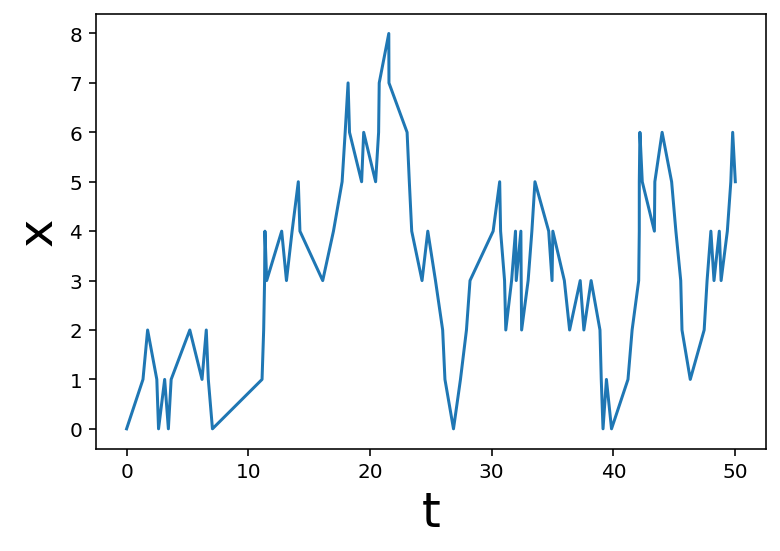

In [82]:
k = 1
gamma = 1
x0 = 0
Nsteps = 1000
X = zeros(Nsteps)
X[0] = x0
T = zeros(Nsteps)
T[0] = 0
for j in arange(1, Nsteps):
    u = rand(1)[0]
    if X[j-1] == 0:
        tau = -log(u)/(k)
        T[j] = T[j-1] + tau
        X[j] = X[j-1] + 1
    else:
        tau = -log(u)/(k+gamma)
        v = rand(1)[0]
        if v>gamma/(k+gamma):
            X[j]=X[j-1]+1 
        else:
            X[j]=X[j-1]-1
        T[j] = T[j-1] + tau


    
plot(T[:100], X[:100])
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);

# Stochastic gene expression model with high and low states

$$
{\text{low} \atop (N=0.5)}
\quad
{{\alpha/\epsilon \atop\longrightarrow}\atop {\longleftarrow \atop  \beta/\epsilon}}
\quad
{\text{high} \atop (N=1)}\quad
$$
where $x$ and $y$ satisfy the ODEs
$$
\dot{x} = \gamma N(t) - \delta x
$$
The solution to the above linear ODE is
$$
x(t) = x_0 e^{-\delta(t - t_0)} + \frac{\gamma N(t)}{\delta}\left(1 -  e^{-\delta(t - t_0)}\right).
$$

In [83]:
def gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    X = zeros(Nsteps)
    X[0] = x0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        u = rand(1)[0]
        rate = beta/epsilon if N[j-1]==high else alpha/epsilon
        tau = -log(u)/rate
        T[j] = T[j-1] + tau
        N[j] = low if N[j-1]==1 else high
        ## update x using the exact solution above
        X[j] = X[j-1]*exp(-delta*tau) + gamma*N[j-1]/delta*(1 - exp(-delta*tau)) 
    return [T, X];

In the limit $\epsilon \to 0^+$, the stochastic process converges to the ODE
$$\dot{x}_{\infty} = E[ N ] \gamma - \delta x_{\infty}, \quad x_{\infty}(0) = x_0,$$
The process $\{N(t):t>0\}$ is a two state Markov process with transition rates $\alpha / \epsilon$ from low to high and $\beta / \epsilon$ from high to low. We have that $$\lim_{t\to\infty}P[N(t)=1] = \frac{\alpha}{\alpha+\beta} + \frac{\beta}{2(\alpha+\beta)}$$
Using the fact $P(N(t)\neq1)=1-P(N(t)=1)$. So we conclude, 
$$
E [N] = \frac{\alpha}{\alpha+\beta} + \frac{\beta}{2(\alpha+\beta)}.$$
The exact solution to the previous ODE in the case $\epsilon \rightarrow 0$ becomes
$$
x_{\infty}(t) = x_0 e^{-\delta t} + \frac{\gamma E [N]}{\delta}\left(1 -  e^{-\delta t}\right).
$$

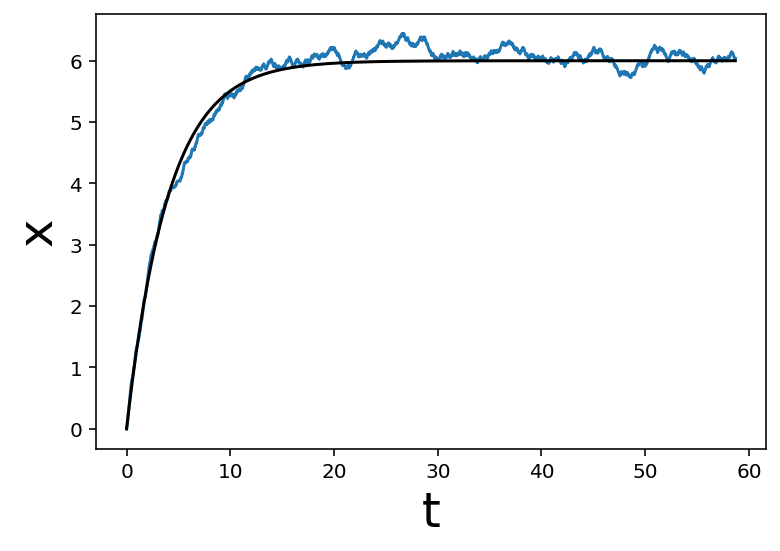

In [89]:
eps = 0.05
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
high = 1
low = 0.5
n0 = high
x0 = 0
Nsteps = 1250
M1 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)

Tinf = linspace(0, M1[0][-1], 200)
Navg = alpha/(alpha + beta)*high + beta/(alpha+beta)*low
Xinf = x0*exp(-delta*Tinf) + gamma*Navg/delta*(1 - exp(-delta*Tinf))
    
plot(M1[0], M1[1])
plot(Tinf, Xinf, 'k')
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);

## Interpreting the parameters of our model
There are three primary parts to the model.
1. The relationship between $\alpha$ and $\beta$ 
2. The effect of $\gamma$ and $\delta$
3. The effect of changing the high and low states

First to evaluate the effect of $\alpha$ and $\gamma$, the restriction $\alpha+\gamma=2$ was introduced and then four cases were considered.
* $\alpha=\gamma=1$
* $\alpha=1.5$,$\beta=0.5$
* $\alpha=1.25$,$\beta=0.75$
* $\alpha=0.5$,$\beta=1.5$

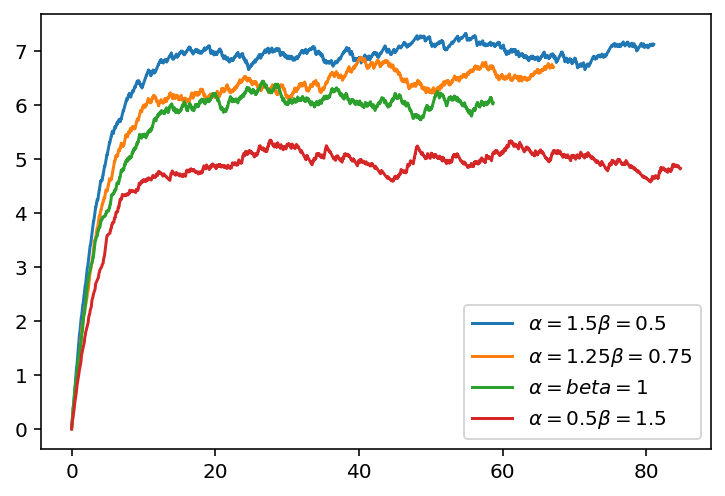

In [90]:
alpha = 1.5
beta = 0.5
M2 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
alpha = 1.25
beta = 0.75
M3 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
alpha = 0.5
beta = 1.5
M4 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)

plot(M2[0], M2[1],label=r'$\alpha=1.5 \beta=0.5$')
plot(M3[0], M3[1],label=r'$\alpha=1.25 \beta=0.75$')
plot(M1[0], M1[1],label=r'$\alpha=beta=1$')
plot(M4[0], M4[1],label=r'$\alpha=0.5 \beta=1.5$')

legend()

So it is clear that $\alpha-\beta$ scales the graph either away or towards the x-axis depending on $sgn(\alpha-\beta)$, further we see that the magnitude of the shift is proportional to $\left|\alpha-\beta\right|$.

Next, the effect of $\gamma$ and $\delta$ were examined by choosing some sample values. Since we are, in general, interested in long term behavior we notice that its the difference $\gamma-\delta$ that is important, but rather the ratio $\gamma/\delta$. This fact is shown in the graph below.

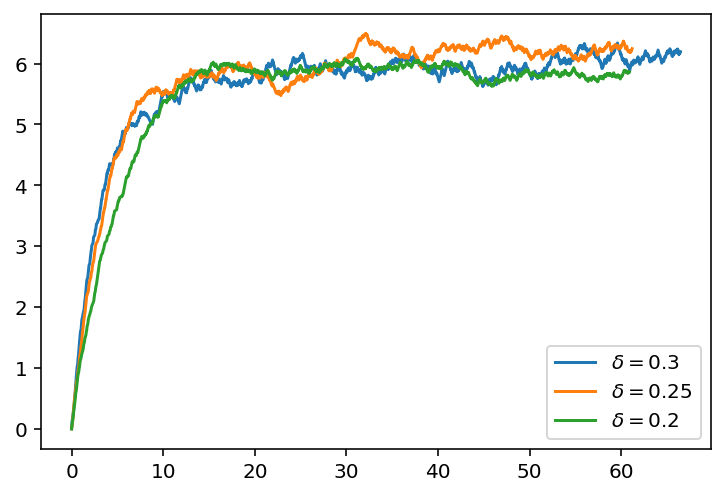

In [87]:
alpha = 1
beta = 1
delta = 0.3
gamma = 8*delta
M2 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
delta = 0.2
gamma = 8*delta
M3 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)


plot(M2[0], M2[1],label=r'$\delta=0.3$')
plot(M1[0], M1[1],label=r'$\delta=0.25$')
plot(M3[0], M3[1],label=r'$\delta=0.2$')
legend()

Thus different samples of ratios $\gamma/\delta$ were chosen.

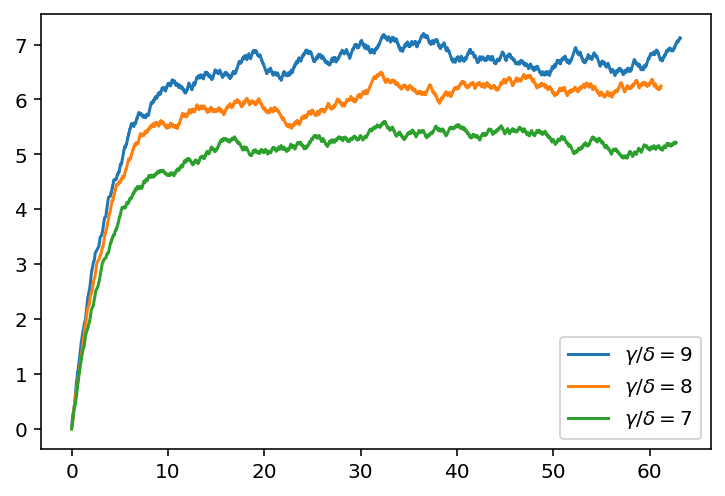

In [88]:
delta = 0.25
gamma = 2.25
M2 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
gamma = 1.75
M3 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)

plot(M2[0], M2[1],label=r'$\gamma/\delta=9$')
plot(M1[0], M1[1],label=r'$\gamma/\delta=8$')
plot(M3[0], M3[1],label=r'$\gamma/\delta=7$')
legend()

Again we see a similar relationship between the ratio $\gamma/\delta$ as there was for the difference $\alpha-\beta$. Mathematically, the two relationships are equivalent. However, biologically they give rise to different scenarios. The rates $\alpha$ and $\beta$ determine how long the system spends in a high or low production state. Where as the parameters $\gamma$ and $\delta$ determine how the system behaves when it is in either state. This is a key distinction, as the system may regulate the time spent in a state very differently than it would regulate the speed at which a gene is expressed. This could be a possible shortcoming of our model.